In [27]:
#!pip install rightmove_webscraper

In [28]:
# Imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rightmove_webscraper
import numpy as np
#%matplotlib inline

In [4]:
# URL for all London properties to rent, added in last 24hrs:
url = "http://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&\
locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&\
minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=1&\
sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&\
secondaryDisplayPropertyType=&oldDisplayPropertyType=&\
oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare="

# Scrape rightmove:
rightmove_data = rightmove_webscraper.rightmove_data(url)

# Create DataFrame of results:
df = rightmove_data.get_results



In [29]:
#print(df)
df.to_csv('output/row_data_rightmove_london_last_24hours_20181001.csv')

In [30]:
print(df.columns)

Index(['price', 'type', 'address', 'url', 'agent_url', 'postcode',
       'number_bedrooms', 'search_date'],
      dtype='object')


In [31]:
df.head()

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
0,2250,4 bedroom flat,"Deptford High Street , Deptford , London , SE8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SE8,4,2018-10-01 10:12:39.983829
1,1408,1 bedroom flat,"Meadow Road, London SW8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW8,1,2018-10-01 10:12:39.983829
2,1235,1 bedroom flat,"Lansdowne Way, London SW8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW8,1,2018-10-01 10:12:39.983829
3,1582,1 bedroom flat,"Vauxhall Grove, London SW8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW8,1,2018-10-01 10:12:39.983829
4,1798,3 bedroom flat,"Wandsworth Road, London SW8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW8,3,2018-10-01 10:12:39.983829


In [32]:
df.dtypes

price                       int64
type                       object
address                    object
url                        object
agent_url                  object
postcode                   object
number_bedrooms            object
search_date        datetime64[ns]
dtype: object

In [33]:
df.describe()

,price
count,476.000000
mean,2776.741597
std,4466.209750
min,400.000000
25%,1400.000000
50%,1798.000000
75%,2852.500000
max,86667.000000


In [34]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cat_cols = ['price', 'type', 'address', 'url', 
            'agent_url', 'postcode', 'number_bedrooms', 'search_date']
count_unique(df, cat_cols)


For column price
1300     16
1950     14
1400     12
1450     12
1750     12
1350     10
1500      9
1250      8
1200      8
1650      7
1100      7
1700      7
2600      7
2275      7
1842      6
2167      6
1150      6
1800      6
1798      5
2860      5
1647      5
2250      5
4767      5
1550      5
2817      4
800       4
1603      4
3033      4
3250      4
1387      4
         ..
3098      1
1875      1
7367      1
1225      1
1235      1
1755      1
3293      1
1257      1
4333      1
2799      1
1777      1
1780      1
1521      1
1280      1
2197      1
1326      1
780       1
790       1
12567     1
3012      1
3358      1
3878      1
3879      1
11050     1
1840      1
825       1
1343      1
1348      1
1352      1
5633      1
Name: price, Length: 197, dtype: int64

For column type
2 bedroom flat                    109
1 bedroom flat                     82
2 bedroom apartment                56
1 bedroom apartment                39
Studio flat                        35
3 be

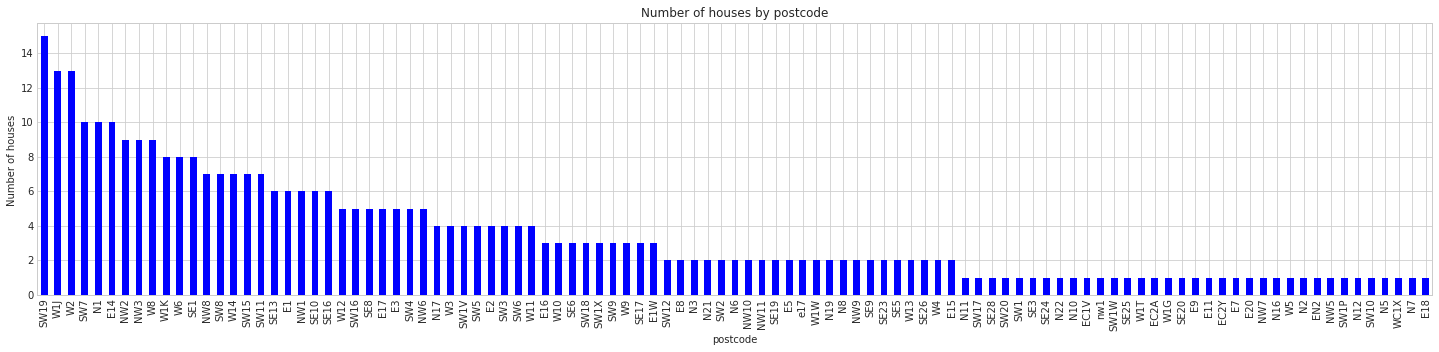

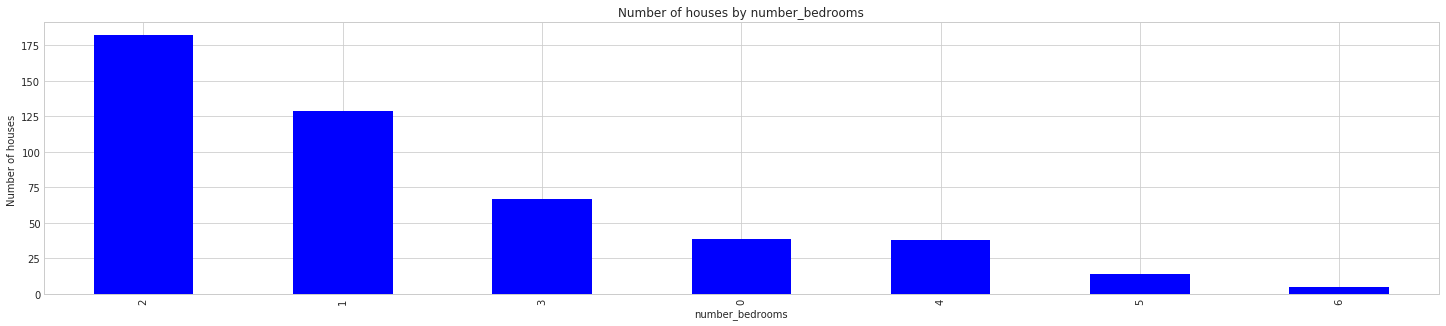

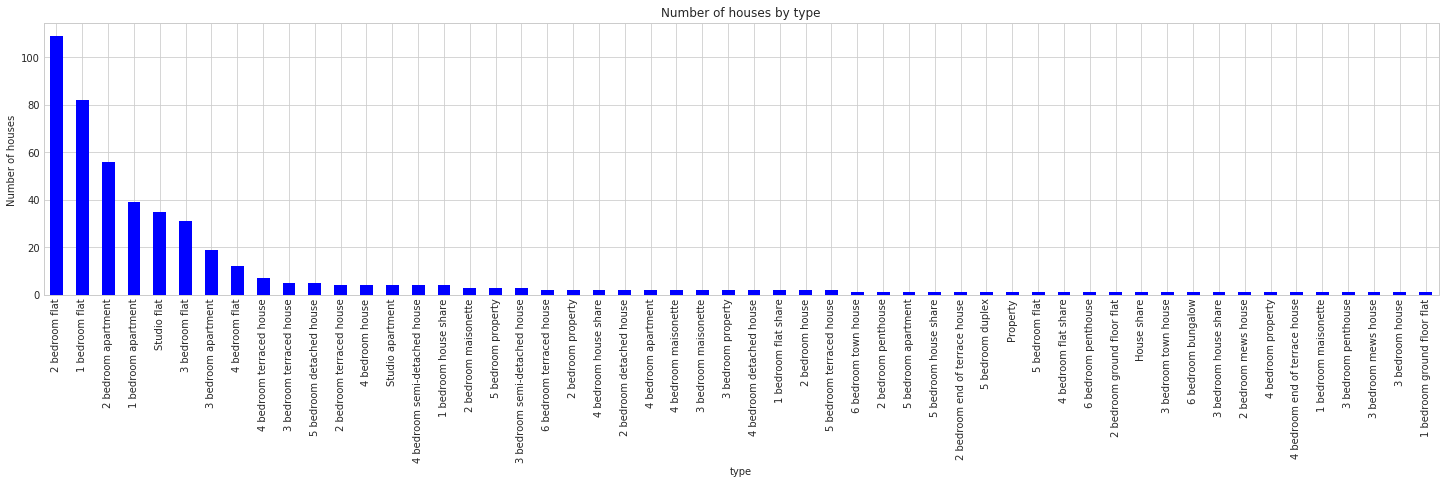

In [35]:
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(25,5)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of houses by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of houses ')# Set text for y axis
        plt.show()

plot_cols = ['postcode', 'number_bedrooms', 'type']
plot_bars(df, plot_cols)  